<a href="https://colab.research.google.com/github/AzamChatrAzar/project1/blob/main/Graph3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

یال‌های گراف:
1 → 2
1 → 4
1 → 10
1 → 12
2 → 7
2 → 11
3 → 7
3 → 10
4 → 7
4 → 12
5 → 2
5 → 8
5 → 9
5 → 10
6 → 4
6 → 8
6 → 11
7 → 1
7 → 3
7 → 7
7 → 11
8 → 11
9 → 2
9 → 10
10 → 4
11 → 1
11 → 11
12 → 3
12 → 11

مقادیر پیج رنک (مرتب‌شده):
رأس 11: 0.2178
رأس 7: 0.1529
رأس 1: 0.1376
رأس 4: 0.1189
رأس 12: 0.0923
رأس 10: 0.0866
رأس 3: 0.0842
رأس 2: 0.0508
رأس 8: 0.0187
رأس 9: 0.0152
رأس 5: 0.0125
رأس 6: 0.0125


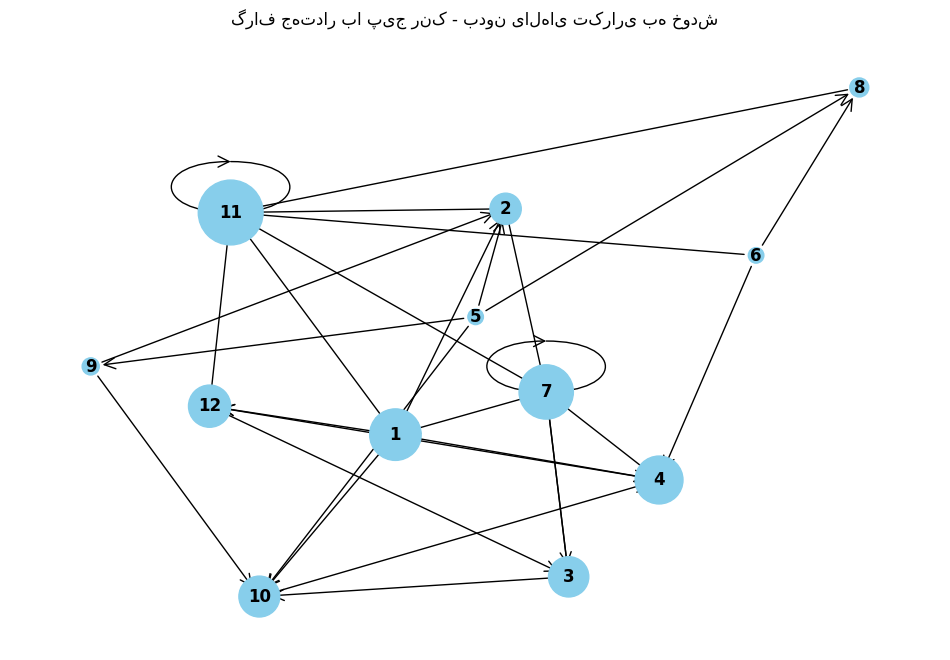

In [47]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

def create_random_digraph(n=12, edge_prob=0.3, self_loop_prob=0.2):
    """
    ایجاد گراف جهت‌دار تصادفی با ویژگی‌های:
    - هر رأس حداکثر یک یال به خودش دارد
    - هیچ رأس ایزوله‌ای وجود ندارد
    - ساختار سلسله مراتبی در یال‌ها
    """
    G = nx.DiGraph()
    nodes = list(range(1, n + 1))
    G.add_nodes_from(nodes)

    # مرحله 1: اضافه کردن یال‌های حلقه با کنترل دقیق
    for i in nodes:
        if random.random() < self_loop_prob:
            # فقط در صورتی اضافه می‌شود که قبلاً وجود نداشته باشد
            if not G.has_edge(i, i):
                G.add_edge(i, i)

    # مرحله 2: اضافه کردن یال‌های معمولی
    for i in nodes:
        for j in nodes:
            if i == j:  # از اضافه کردن یال تکراری به خودش جلوگیری می‌کند
                continue
            if i < j and random.random() < edge_prob:
                G.add_edge(i, j)
            elif i > j and random.random() < edge_prob/2:
                G.add_edge(i, j)

    # مرحله 3: اطمینان از عدم وجود رأس بدون یال خروجی
    for node in nodes:
        if G.out_degree(node) == 0:
            # انتخاب تصادفی یک رأس دیگر به عنوان مقصد
            targets = [n for n in nodes if n != node]
            if targets:
                G.add_edge(node, random.choice(targets))

    return G

def compute_pagerank(G, damping=0.85, max_iter=100, tol=1e-6):
    """محاسبه پیج رنک با روش تکراری"""
    nodes = sorted(G.nodes())
    n = len(nodes)

    # ماتریس انتقال
    M = np.zeros((n, n))
    for i in nodes:
        neighbors = list(G.successors(i))
        out_degree = len(neighbors)
        if out_degree > 0:
            for j in neighbors:
                M[i-1][j-1] = 1 / out_degree
        else:
            M[i-1] = np.ones(n) / n  # برای رأس‌های بدون یال خروجی

    # اعمال ضریب میراکنندگی
    M = damping * M + (1 - damping) / n * np.ones((n, n))

    # محاسبه تکراری
    pagerank = np.ones(n) / n
    for _ in range(max_iter):
        new_pagerank = M.T @ pagerank
        if np.linalg.norm(new_pagerank - pagerank) < tol:
            break
        pagerank = new_pagerank

    return {node: score for node, score in zip(nodes, pagerank)}

def visualize_graph(G, pagerank):
    """رسم گراف با نمایش پیج رنک"""
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)

    # اندازه گره‌ها متناسب با پیج رنک
    node_sizes = [pagerank[node] * 10000 for node in G.nodes()]

    # رسم گراف
    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue')
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20)

    # مشخص کردن یال‌های حلقه
    self_loops = [(n, n) for n in G.nodes() if G.has_edge(n, n)]
    nx.draw_networkx_edges(G, pos, edgelist=self_loops,
                         connectionstyle="arc3,rad=0.3",
                         edge_color='red', arrowstyle='->')

    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    plt.title("گراف جهت‌دار با پیج رنک - بدون یال‌های تکراری به خودش")
    plt.axis('off')
    plt.show()

# اجرای برنامه
G = create_random_digraph(n=12, edge_prob=0.25, self_loop_prob=0.3)
pagerank = compute_pagerank(G)

# نمایش نتایج
print("یال‌های گراف:")
for edge in sorted(G.edges()):
    print(f"{edge[0]} → {edge[1]}")

print("\nمقادیر پیج رنک (مرتب‌شده):")
for node, score in sorted(pagerank.items(), key=lambda x: -x[1]):
    print(f"رأس {node}: {score:.4f}")

# رسم گراف
visualize_graph(G, pagerank)

In [51]:
import random
from sympy import symbols, Poly, expand

def generate_binary_polynomial(max_degree=12):
    """
    Generate a random binary polynomial with:
    - Binary coefficients (0 or 1)
    - Maximum degree of max_degree
    - Non-constant (degree ≥ 1)
    - Ensures at least one non-zero coefficient
    """
    x = symbols('x')

    while True:
        degree = random.randint(1, max_degree)
        coeffs = [random.choice([0, 1]) for _ in range(degree + 1)]

        # Ensure polynomial is:
        # 1. Non-constant (degree ≥ 1)
        # 2. Has at least one non-zero coefficient
        if sum(coeffs) > 0 and coeffs[-1] == 1:
            break

    return Poly(coeffs, x)

def generate_unique_binary_polynomials(num_polys=50, max_degree=12):
    """
    Generate unique binary polynomials without duplicates
    """
    polynomials = set()

    while len(polynomials) < num_polys:
        poly = generate_binary_polynomial(max_degree)
        poly_str = str(poly.as_expr())  # Standard string representation

        if poly_str not in polynomials:
            polynomials.add(poly_str)

    # Convert back to Poly objects and sort by degree
    poly_list = [Poly(poly_str, symbols('x')) for poly_str in polynomials]
    poly_list.sort(key=lambda p: p.degree(), reverse=True)

    return poly_list

# Generate 50 unique binary polynomials
binary_polynomials = generate_unique_binary_polynomials(num_polys=50)

# Display sample output
print("Sample Generated Binary Polynomials:")
for i, poly in enumerate(binary_polynomials[:10], 1):
    print(f"{i}. {poly.as_expr()}")

print(f"\nTotal Binary Polynomials Generated: {len(binary_polynomials)}")
print(f"Highest Degree Generated: {binary_polynomials[0].degree()}")

Sample Generated Binary Polynomials:
1. x**12 + x**9 + x**8 + x**7 + x**6 + x**3 + x + 1
2. x**12 + x**11 + x**9 + x**7 + x**5 + 1
3. x**11 + x**8 + x**6 + x**2 + 1
4. x**11 + x**8 + x**7 + x**6 + x**4 + x**3 + 1
5. x**11 + x**10 + x**9 + x**8 + x**7 + x**6 + x**5 + x**4 + x**2 + x + 1
6. x**11 + x**9 + x**8 + x**7 + x**6 + x**4 + x**2 + 1
7. x**10 + x**9 + x**8 + x**7 + x**5 + x**2 + x + 1
8. x**10 + x**9 + x**6 + x**4 + 1
9. x**9 + x**8 + x**5 + x**4 + x**3 + x**2 + x + 1
10. x**9 + x**8 + x**3 + 1

Total Binary Polynomials Generated: 50
Highest Degree Generated: 12
